In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler;
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score

In [62]:
df = pd.read_csv("D:/Datasets/15_7_2024/adult.csv/adult.csv")

In [163]:
df.head(15)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,continent
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,-1.422331,0,4356,40,United-States,<=50K,North America
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,-1.422331,0,4356,18,United-States,<=50K,North America
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,-1.422331,0,4356,40,United-States,<=50K,North America
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,-1.422331,0,3900,40,United-States,<=50K,North America
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,-1.422331,0,3900,40,United-States,<=50K,North America
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,-1.422331,0,3770,45,United-States,<=50K,North America
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,0.703071,0,3770,40,United-States,<=50K,North America
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,-1.422331,0,3683,20,United-States,>50K,North America
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,-1.422331,0,3683,40,United-States,<=50K,North America
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,0.703071,0,3004,60,?,>50K,UNKNOWN


In [12]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [15]:
df['capital.gain'].info

<bound method Series.info of 0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: capital.gain, Length: 32561, dtype: int64>

In [16]:
df['capital.gain'].value_counts()

capital.gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
4931         1
7978         1
5060         1
2538         1
Name: count, Length: 119, dtype: int64

In [75]:
newcap_gain = df['capital.gain']

In [10]:
newcap_gain.value_counts()

capital.gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
4931         1
7978         1
5060         1
2538         1
Name: count, Length: 119, dtype: int64

In [11]:
newcap_gain.head()

0    0
1    0
2    0
3    0
4    0
Name: capital.gain, dtype: int64

In [12]:
cg_great = newcap_gain>0

In [18]:
cg_great.head()

0    False
1    False
2    False
3    False
4    False
Name: capital.gain, dtype: bool

In [19]:
# calculating the percentage

In [20]:
cg_per = (newcap_gain/32560)*100

In [21]:
# percentage of individuals who have a capital-gain greater than 0.

In [22]:
cg_per.value_counts()

capital.gain
0.000000      29849
46.142506       347
23.611794       284
22.414005       246
307.122236      159
              ...  
3.412162          1
15.144349         1
24.502457         1
15.540541         1
7.794840          1
Name: count, Length: 119, dtype: int64

In [ ]:
# Calculate the proportion of each marital-status category within the dataset

In [107]:
df['marital.status'].value_counts()

marital.status
2    14976
4    10683
0     4443
5     1025
6      993
3      418
1       23
Name: count, dtype: int64

In [108]:
newmarital = df['marital.status']

In [109]:
newmarital.head()

0    6
1    6
2    6
3    0
4    5
Name: marital.status, dtype: int32

In [101]:
le=LabelEncoder()

In [104]:
df['marital.status']=le.fit_transform(df['marital.status'])

In [106]:
df['marital.status'].value_counts()

marital.status
2    14976
4    10683
0     4443
5     1025
6      993
3      418
1       23
Name: count, dtype: int64

In [113]:
newmarital.sum()

85044

In [115]:
mar_propo = (newmarital/newmarital.sum())*100

In [ ]:
# proportion of each marital-status

In [119]:
mar_propo.head(10)

0    0.007055
1    0.007055
2    0.007055
3    0.000000
4    0.005879
5    0.000000
6    0.005879
7    0.004703
8    0.000000
9    0.004703
Name: marital.status, dtype: float64

In [ ]:
# Find the top 5 most common native-country entries.

In [124]:
df['native.country'].value_counts().head()

native.country
United-States    29170
Mexico             643
?                  583
Philippines        198
Germany            137
Name: count, dtype: int64

In [23]:
# Compute the total hours-per-week worked by individuals in the occupation 'Exec-managerial'.

In [24]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [25]:
df['execManagerial'] = df['occupation']=='Exec-managerial'

In [26]:
df['execManagerial'].head()

0    False
1     True
2    False
3    False
4    False
Name: execManagerial, dtype: bool

In [27]:
newdf = df['execManagerial'],df['hours.per.week']

In [28]:
newdf

(0        False
 1         True
 2        False
 3        False
 4        False
          ...  
 32556    False
 32557    False
 32558    False
 32559    False
 32560    False
 Name: execManagerial, Length: 32561, dtype: bool,
 0        40
 1        18
 2        40
 3        40
 4        40
          ..
 32556    40
 32557    38
 32558    40
 32559    40
 32560    20
 Name: hours.per.week, Length: 32561, dtype: int64)

In [76]:
# Create a new column age_range that categorizes age into ranges: '18-30', '31-45', '46-60',# '61+'.

In [77]:
def category_range(age):
    if age>=18 and age<=30:
        return '18-30'
    elif age>=31 and age<=45:
        return '31-45'
    elif age>=46 and age<=60:
        return '46-60'
    else:
        return '61+'

In [78]:
df['age_range'] = df['age'].apply(category_range)

In [79]:
df['age_range'].head(20)

0       61+
1       61+
2       61+
3     46-60
4     31-45
5     31-45
6     31-45
7       61+
8       61+
9     31-45
10    31-45
11    31-45
12    46-60
13    31-45
14    46-60
15    46-60
16    31-45
17    46-60
18    18-30
19    31-45
Name: age_range, dtype: object

In [80]:
# Determine the average fnlwgt value for individuals with education-num greater than 10.

In [81]:
eduNum_great = df['education.num']>10

In [82]:
eduNum_great

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557     True
32558    False
32559    False
32560    False
Name: education.num, Length: 32561, dtype: bool

In [83]:
avg_fnlwgt = df['fnlwgt'].mean()

In [84]:
 pd.get_dummies('eduNum_great')

,eduNum_great
0,True


In [85]:
eduNum_great.value_counts()

education.num
False    22045
True     10516
Name: count, dtype: int64

In [86]:
print(avg_fnlwgt,eduNum_great)

189778.36651208502 0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557     True
32558    False
32559    False
32560    False
Name: education.num, Length: 32561, dtype: bool


In [87]:
# Calculate the ratio of males to females in the dataset.

In [88]:
df['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

In [114]:
#shape[0] is used to find the total count of the paticular value
count_male = df[df['sex'] == 'Male'].shape[0]
count_female = df[df['sex'] == 'Female'].shape[0]

In [115]:
count_male

21790

In [116]:
count_female

10771

In [117]:
if count_female != 0:
    ratio = count_male / count_female
else:
    ratio = None

In [120]:
print(f"Number of males: {count_male}")
print(f"Number of females: {count_female}")

print(f"Ratio of males to females: {ratio}")

Number of males: 21790
Number of females: 10771
Ratio of males to females: 2.0230247887846997


In [132]:
#Identify the education level with the highest average capital-loss.

In [138]:
avg_newCap = df.groupby('education')['capital.loss'].mean()

In [140]:
print(f"Highest Average: {avg_newCap}")

Highest Average: education
10th             56.845659
11th             50.079149
12th             32.337182
1st-4th          48.327381
5th-6th          68.252252
7th-8th          65.668731
9th              28.998054
Assoc-acdm       93.418932
Assoc-voc        72.754703
Bachelors       118.350327
Doctorate       262.845036
HS-grad          70.466622
Masters         166.719675
Preschool        66.490196
Prof-school     231.203125
Some-college     71.637087
Name: capital.loss, dtype: float64


In [141]:
#Calculate the median 'age' for each 'workclass' category.

In [142]:
medianAge = df.groupby('workclass')['age'].median()

In [146]:
print(f"Median AGE by WORKCLASS:{medianAge}")

Median AGE by WORKCLASS:workclass
?                   35.0
Federal-gov         43.0
Local-gov           41.0
Never-worked        18.0
Private             35.0
Self-emp-inc        45.0
Self-emp-not-inc    44.0
State-gov           39.0
Without-pay         57.0
Name: age, dtype: float64


In [147]:
#>50k

In [180]:
hig_income = df[df['income'] == '>50K']

In [186]:
occu_perc = hig_income.groupby('occupation')['income'].count() / len(hig_income) * 100

In [187]:
occu_perc

occupation
?                     5.660146
Adm-clerical         11.578268
Armed-Forces          0.027640
Craft-repair         12.588680
Exec-managerial      12.487331
Farming-fishing       3.052732
Handlers-cleaners     4.207487
Machine-op-inspct     6.148460
Other-service        10.119468
Priv-house-serv       0.457603
Prof-specialty       12.714597
Protective-serv       1.993182
Sales                11.209729
Tech-support          2.850035
Transport-moving      4.904641
Name: income, dtype: float64

In [188]:
#Find the number of individuals with hours-per-week equal to the maximum value in this column.

In [189]:
high_hour = df['hours.per.week'].max()

In [192]:
count_hours = df[df['hours.per.week'] == high_hour].shape[0]

In [194]:
print(f"Number of individuals with {high_hour} hours per week is: {count_hours}")

Number of individuals with 99 hours per week is: 85


In [195]:
#Create a boolean mask to filter out rows where 'native-country' is not 'United States' and then count these rows.

In [196]:
df['native.country']

0        United-States
1        United-States
2        United-States
3        United-States
4        United-States
             ...      
32556    United-States
32557    United-States
32558    United-States
32559    United-States
32560    United-States
Name: native.country, Length: 32561, dtype: object

In [197]:
native_notUS = df['native.country']!= 'United-States'

In [198]:
len(native_notUS)

32561

In [199]:
#Calculate the average hours-per-week for each combination of sex and marital-status.

In [206]:
avg_hour = df.groupby(['sex', 'marital.status'])['hours.per.week'].mean()

In [207]:
avg_hour

sex     marital.status       
Female  Divorced                 39.578967
        Married-AF-spouse        31.214286
        Married-civ-spouse       36.732649
        Married-spouse-absent    37.078049
        Never-married            35.010489
        Separated                37.702060
        Widowed                  32.523636
Male    Divorced                 43.762846
        Married-AF-spouse        56.555556
        Married-civ-spouse       44.100008
        Married-spouse-absent    42.164319
        Never-married            38.494760
        Separated                41.862944
        Widowed                  35.220238
Name: hours.per.week, dtype: float64

In [171]:
#Find the standard deviation of age for individuals with income of '>50K' compared to those with '<=50K'.



#COMPARISON PENDING

In [18]:
high_income = df[df['income'] == '>50K']
low_income = df[df['income'] == '<=50K']

In [167]:
# Calculate standard deviation for high-income individuals
df['highIncome'] = high_income['age'].std()


In [168]:
df['highIncome'] 

0        10.519028
1        10.519028
2        10.519028
3        10.519028
4        10.519028
           ...    
32556    10.519028
32557    10.519028
32558    10.519028
32559    10.519028
32560    10.519028
Name: highIncome, Length: 32561, dtype: float64

In [169]:
df['low_income'] = low_income['age'].std()

In [170]:
df['low_income']

0        14.020088
1        14.020088
2        14.020088
3        14.020088
4        14.020088
           ...    
32556    14.020088
32557    14.020088
32558    14.020088
32559    14.020088
32560    14.020088
Name: low_income, Length: 32561, dtype: float64

In [20]:
#lambda function to create a new column income_label that labels income as 'High' if '>50K' and 'Low' if '<=50K'.

In [29]:
df['high_incom'] = df['income'].apply(lambda x: 'HIGH' if x == '>50K' else 'LOW')

In [30]:
df['high_incom'].value_counts()

high_incom
LOW     24720
HIGH     7841
Name: count, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
 15  high_incom      32561 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.0+ MB


In [34]:
# Group the DataFrame by race and sex and find the maximum capital-gain within each group.

In [39]:
df.groupby(['race', 'sex'])['capital.gain'].max()

race                sex   
Amer-Indian-Eskimo  Female    15024
                    Male      27828
Asian-Pac-Islander  Female    99999
                    Male      99999
Black               Female    99999
                    Male      99999
Other               Female     7688
                    Male      99999
White               Female    99999
                    Male      99999
Name: capital.gain, dtype: int64

In [189]:
# LabelEncoding

In [190]:
le = LabelEncoder()

In [191]:
df['sex']=le.fit_transform(df['sex'])

In [192]:
df['sex']

0        0
1        0
2        0
3        0
4        0
        ..
32556    1
32557    0
32558    1
32559    0
32560    1
Name: sex, Length: 32561, dtype: int64

In [193]:
# StandardScaler

In [194]:
sc=StandardScaler()

In [195]:
df['sex']=sc.fit_transform(df['sex'].values.reshape(-1,1))

In [196]:
#K-MEANS CLUSTERING

In [197]:
x = df[['sex','hours.per.week']]

In [198]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

C:\Users\athul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\athul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\athul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\athul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\athul\anaconda3\Lib\site-packages\sklearn\clust

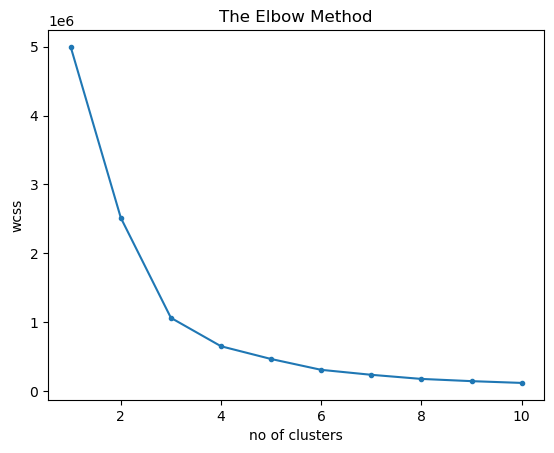

In [199]:
plt.plot(range(1,11), wcss,marker=".")
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [200]:
km=KMeans(n_clusters=3,random_state=42)

In [201]:
km.fit(x)

C:\Users\athul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

C:\Users\athul\AppData\Local\Temp\ipykernel_18848\3103413415.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['age'],df['hours.per.week'],cmap='viridis',s=50,alpha=0.8,edgecolors='k')


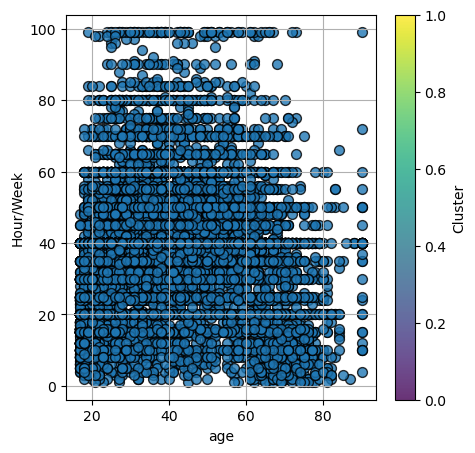

In [202]:
plt.figure(figsize=(5,5))
plt.scatter(df['age'],df['hours.per.week'],cmap='viridis',s=50,alpha=0.8,edgecolors='k')
plt.xlabel('age')
plt.ylabel('Hour/Week')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [203]:
#Implement and apply a function that detects outliers in the age column using the IQR method and count the number of outliers.

In [204]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

In [205]:
IQR = Q3 - Q1

In [206]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [207]:
lower_bound

-2.0

In [208]:
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

In [209]:
#counting the outliers
num_outliers = len(outliers)

In [210]:
print(f"Total Number of Outliers are: {num_outliers}")

Total Number of Outliers are: 143


In [211]:
#Implement and apply a function that converts the native-country column into continent-based categories (e.g., North America, Europe), then analyze the distribution of income across these new categories.

In [212]:
def map_country_to_continent(country):
    continent_mapping = {
        'United-States': 'North America',
        'Canada': 'North America',
        'Mexico': 'North America',
        
        # Add other countries and their corresponding continents here
    }
    return continent_mapping.get(country,'UNKNOWN')

df['continent'] = df['native.country'].apply(map_country_to_continent)


In [213]:
df['continent'].value_counts()

continent
North America    29934
UNKNOWN           2627
Name: count, dtype: int64

In [214]:
df['age'].value_counts()

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

In [215]:
df['continent'].head(10)

0    North America
1    North America
2    North America
3    North America
4    North America
5    North America
6    North America
7    North America
8    North America
9          UNKNOWN
Name: continent, dtype: object

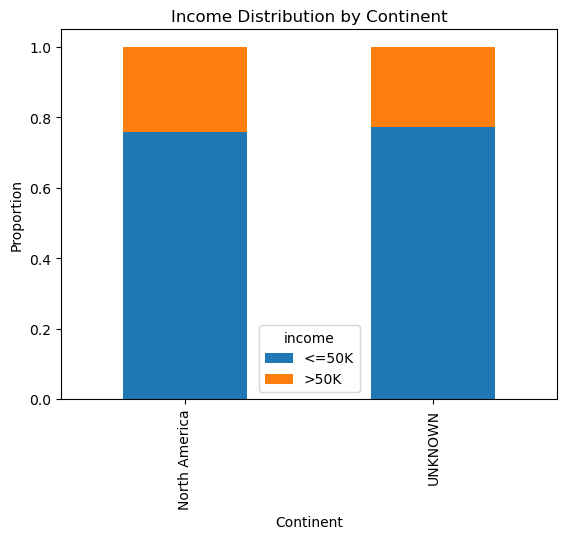

In [216]:
import matplotlib.pyplot as plt

# Assuming your income column is named 'income'
income_by_continent = df.groupby('continent')['income'].value_counts(normalize=True).unstack()

# Plot the income distribution
income_by_continent.plot(kind='bar', stacked=True)
plt.xlabel('Continent')
plt.ylabel('Proportion')
plt.title('Income Distribution by Continent')
plt.show()
